In [1]:
# Import library

import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

## Import data

In [2]:
# Load the datasets
train_data = pd.read_csv('Data/Loan_dataset_train.csv') # This is the portion of the dataset used to "train" or fit the model.
test_data = pd.read_csv('Data/Loan_dataset_test.csv') # This subset is reserved for evaluating the model’s performance after training.

In [3]:
# Display the first few rows of the training dataset
print("Training Data Head:")
train_data.head()

Training Data Head:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# # Display the first few rows of the test dataset
print("\nTest Data Head:")
test_data.head()


Test Data Head:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Understanding the data

In [5]:
# Data columns
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are 12 independent variables and 1 target variable, i.e., `Loan_Status`

In [6]:
# Data columns
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

The test dataset contains the same features as the training dataset, except for `Loan_Status`. The model will be trained on the training data to predict `Loan_Status` for the test dataset.

The description of each variable is provided below.

| Variable           | Description                                  |
|--------------------|----------------------------------------------|
| Loan_ID            | Unique Loan ID                               |
| Gender             | Male/ Female                                 |
| Married            | Applicant married (Y/N)                      |
| Dependents         | Number of dependents                         |
| Education          | Applicant Education (Graduate/Under Graduate)|
| Self_Employed      | Self employed (Y/N)                          |
| ApplicantIncome    | Applicant income                             |
| CoapplicantIncome  | Coapplicant income                           |
| LoanAmount         | Loan amount in thousands                     |
| Loan_Amount_Term   | Term of loan in months                       |
| Credit_History     | Creof individual’s repayment of their debts guidelines              |
| Property_Area      | Urban/ Semi Urban/ Rural                     |
| Loan_Status        | Loan approved (Y/N)                          |


In [7]:
# Dataset shape
train_data.shape, test_data.shape

((614, 13), (367, 12))

The training dataset contains 614 rows and 13 columns, while the test dataset includes 367 rows and 12 columns.

In [8]:
# Remove the Loan_ID variable since it doesn't impact the loan status. 

train_data = train_data.drop('Loan_ID', axis=1)
test_data = test_data.drop('Loan_ID', axis=1)

## Data Exploration
Expanding on the exploratory analysis will allow to better understand the data distribution, feature relationships, and key patterns.

### Univariate analysis
This part focuses on examining each feature individually, understanding the distribution of categorical and numerical variables, and identifying potential outliers.

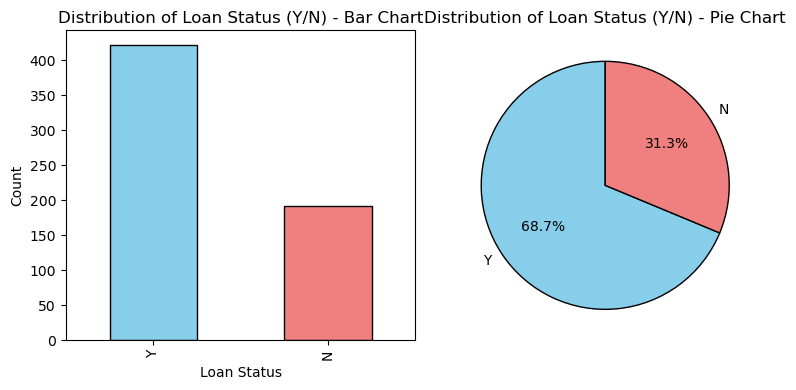

In [9]:
# Bar chart and pie chart
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Bar chart for 'Loan_Status' distribution

# Counting the values for 'Loan_Status'
loan_status_counts = train_data['Loan_Status'].value_counts()
# Calculating percentages for pie chart
total = loan_status_counts.sum()
loan_status_percentages = (loan_status_counts / total) * 100

loan_status_counts.plot.bar(ax=axes[0], color=['skyblue', 'lightcoral'], edgecolor='black')
axes[0].set_title('Distribution of Loan Status (Y/N) - Bar Chart')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')

# Pie chart for 'Loan_Status' distribution
axes[1].pie(loan_status_percentages, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90, 
            colors=['skyblue', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Distribution of Loan Status (Y/N) - Pie Chart')

# Displaying the combined plot
plt.tight_layout()
plt.show()

The distribution plot shows that the target variable, `Loan_Status`, has more approved loans (labeled as Y) than disapproved ones (labeled as N). 68.7% had received loan approval, while 31.3% were rejected.

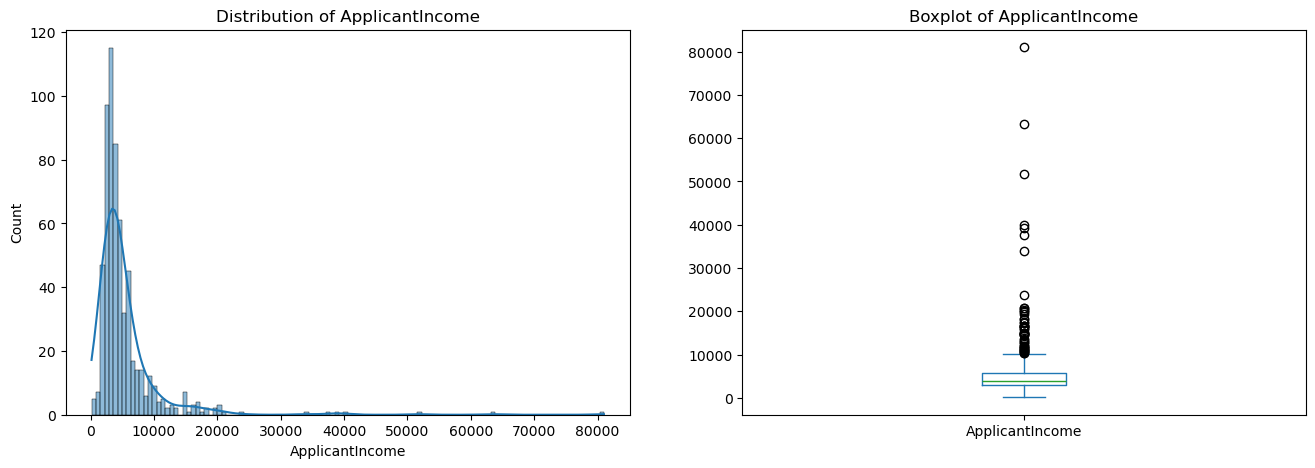

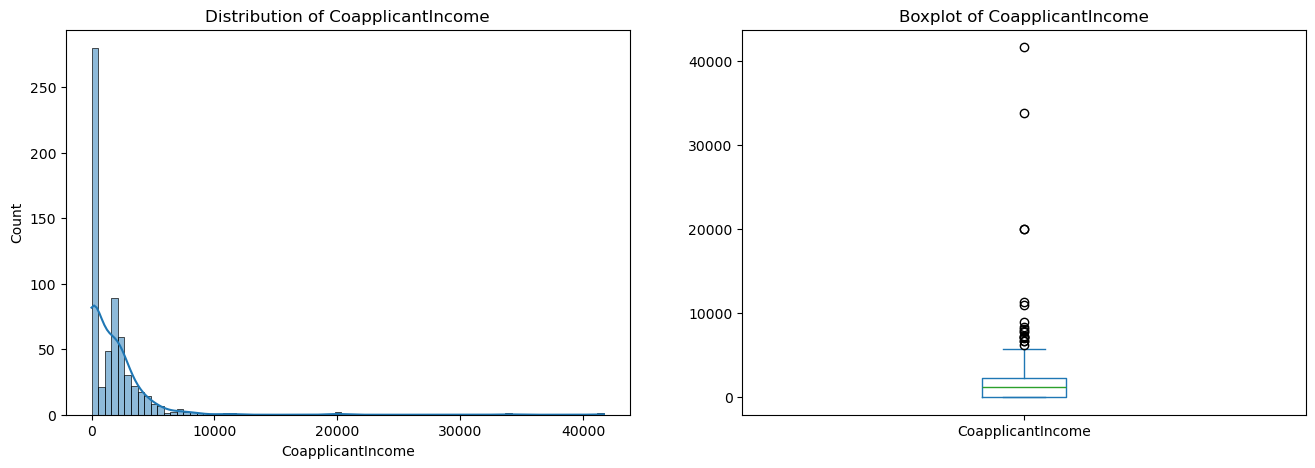

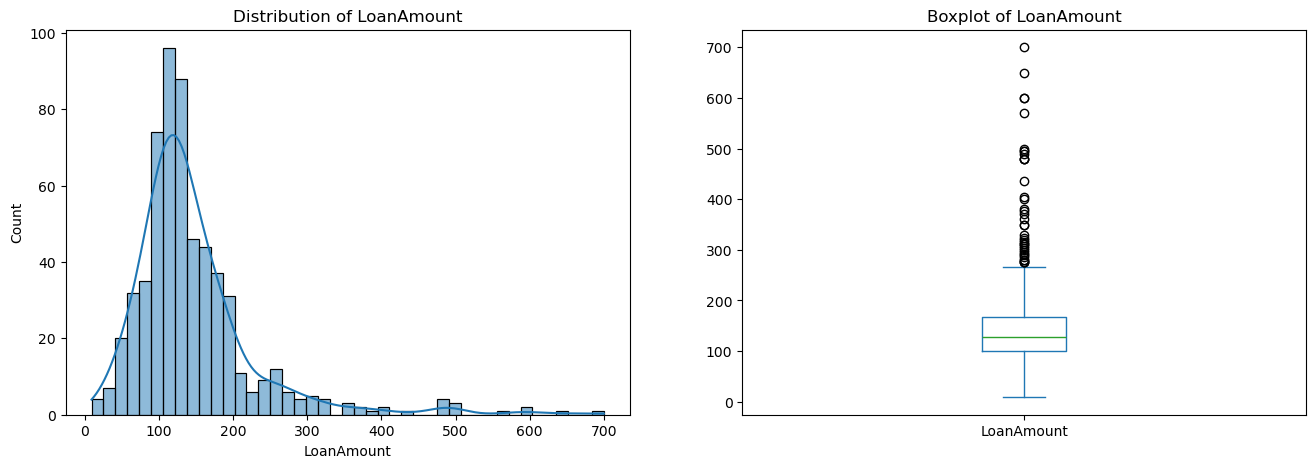

In [10]:
# Distributions of numerical features

# List of numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'] 

# Loop through each column to create distribution and boxplots
for column in numerical_columns:
    plt.figure(figsize=(16, 5))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(train_data[column], kde=True)  
    plt.title(f'Distribution of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    train_data[column].plot.box()
    plt.title(f'Boxplot of {column}')
    
    plt.show()

The histograms show that the distribution of `ApplicantIncome` and `CoapplicantIncome` are right-skewed, indicating that a few applicants have significantly higher incomes than others. This skewness might necessitate scaling or transformation for more effective modeling. 
Additionally, `LoanAmount` also exhibits a similar right-skewed distribution.
There are also some outliers that will be addressed in later sections.

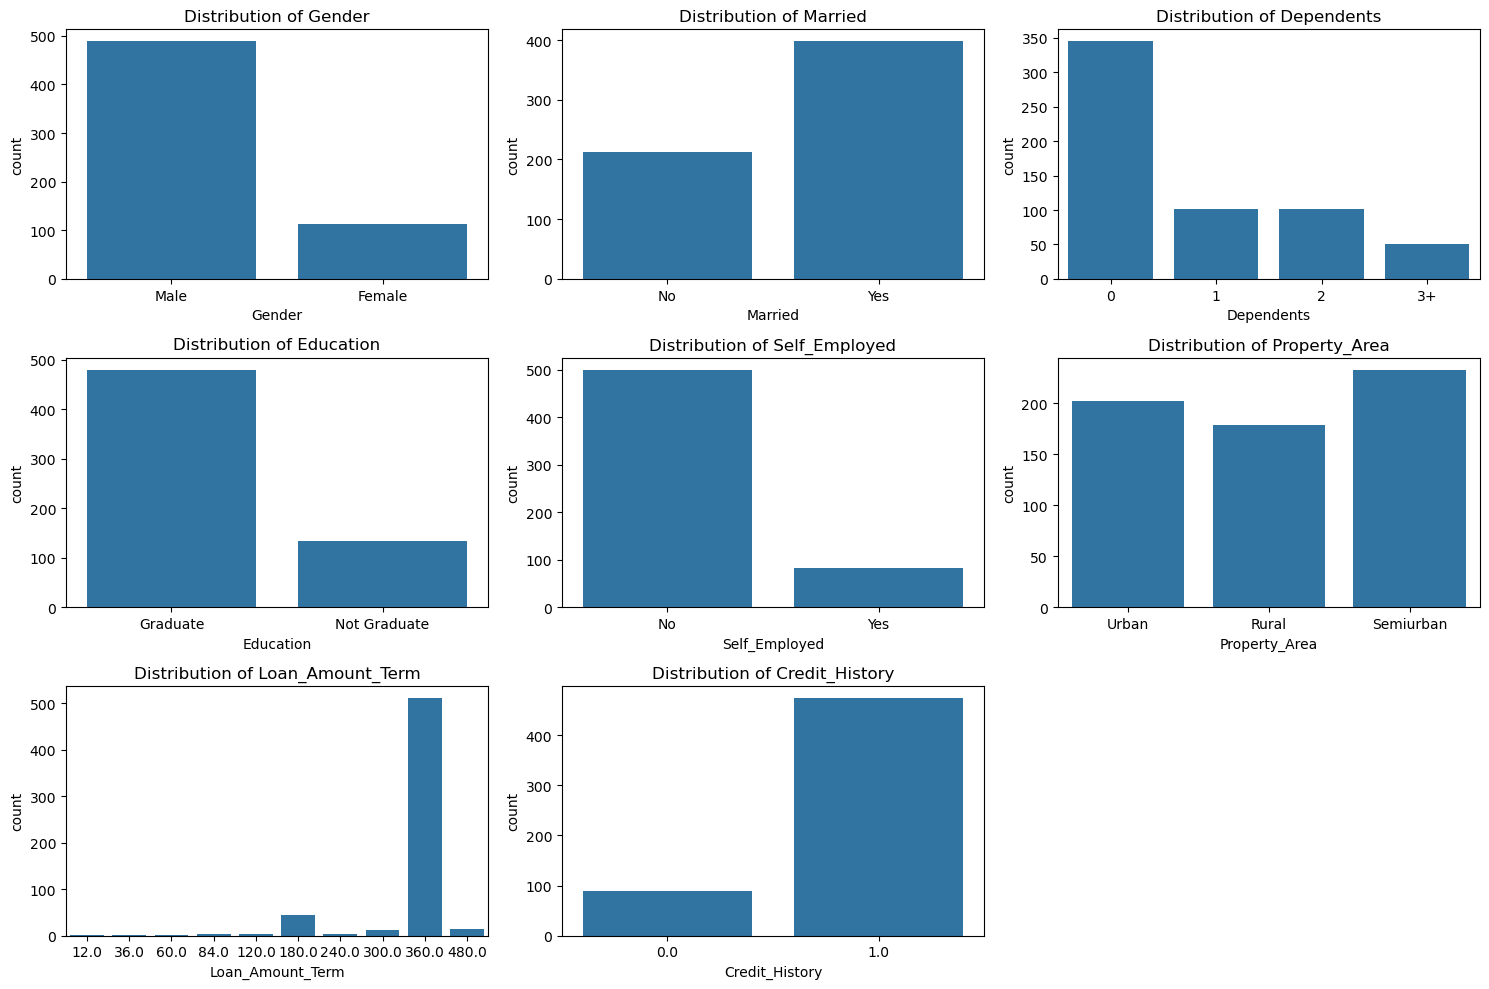

In [11]:
# Distributions of categorical features

# List of categorical columns
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term', 'Credit_History']

# Plot through each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=train_data, x=column)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

The count plots reveal key characteristics of the categorical features:

- `Gender` and `Married`: The majority of applicants are male and married.
- `Dependents`: There is a higher proportion of applicants without dependents, with fewer applicants reporting multiple dependents.
- `Education`: Most applicants are graduates.
- `Self_Employed`: Fewer applicants are self-employed, which might be a distinguishing characteristic among applicants.
- `Credit_History`: The majority of applicants have repaid their debts
- `Property_Area`: The distribution is fairly balanced across *Rural*, *Urban*, and *Semiurban* areas, potentially aiding in differentiating loan outcomes based on geographic context.

### Bivariate Analysis

Bivariate analysis explores the relationship between each feature and the target variable, allowing to examine potential correlations or patterns.


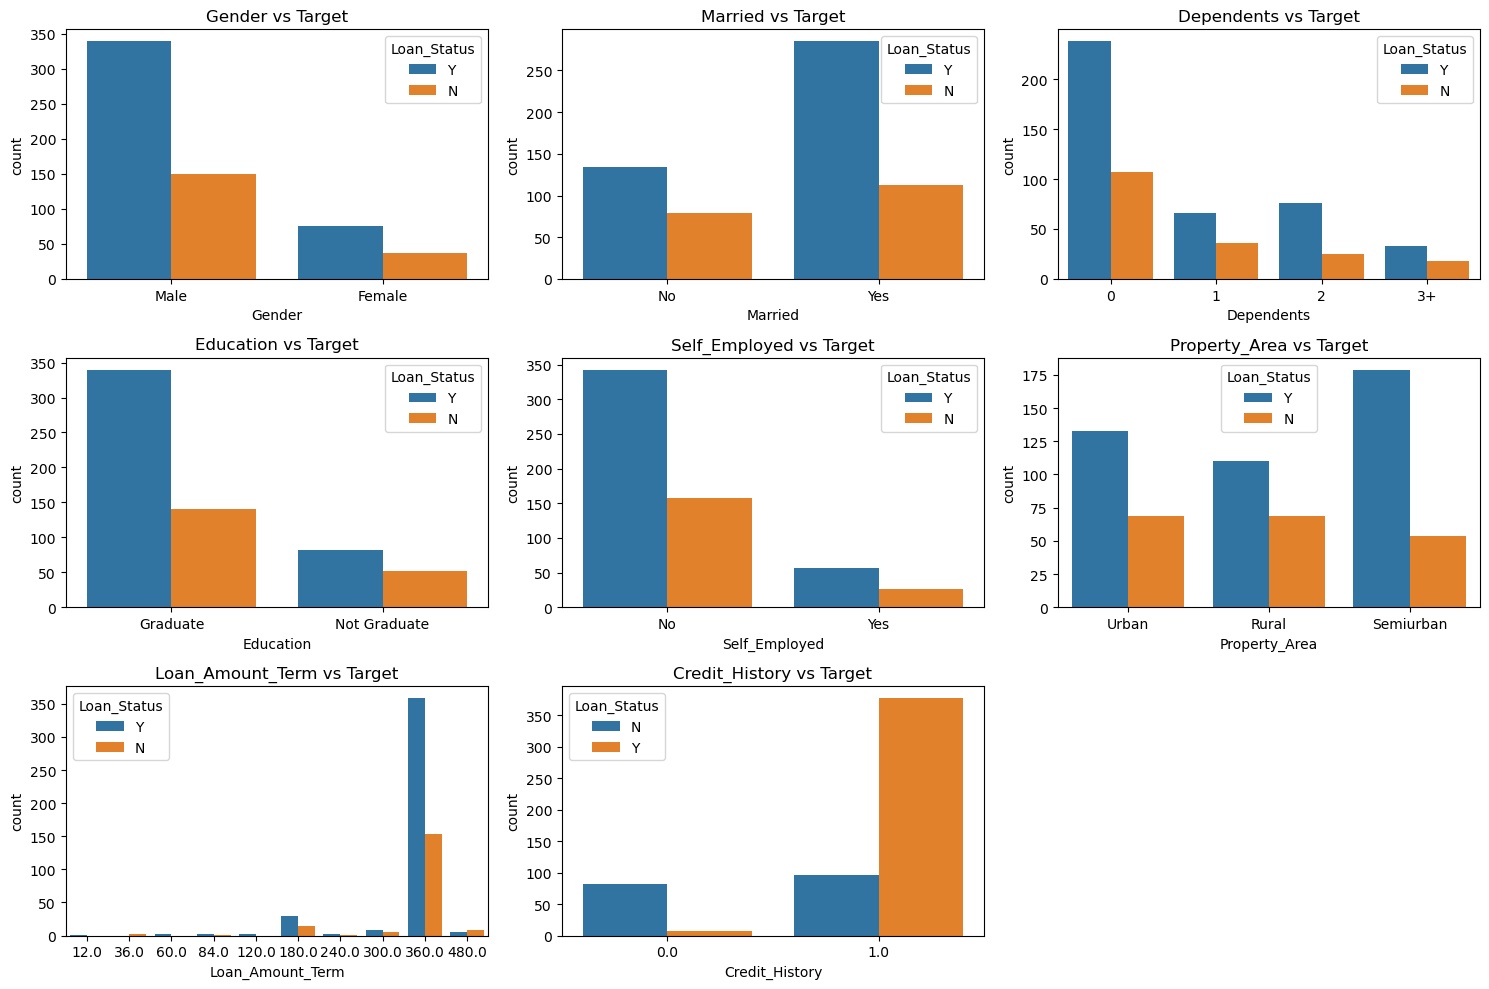

In [12]:
# Countplots for categorical features with respect to target
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=train_data, x=column, hue='Loan_Status')  
    plt.title(f'{column} vs Target')
plt.tight_layout()
plt.show()

The count plots for categorical features reveal key relationships with loan approval status (`Loan_Status`). Here’s a summary of the insights:

- Male and married applicants have slightly higher loan approval rates, though this difference is minor.
- Applicants with fewer dependents appear to have slightly better approval rates.
- Graduates show higher loan approval rates than non-graduates.
- Non-self-employed applicants have higher approval rates.
- Applicants with a credit history (recorded as e1 ) show a significantly higher loan approval rate, indicating it is a strong predictor.
- Approval rates are higher in *Semiurban* areas compared to *Urban* and *Rural* areas. 

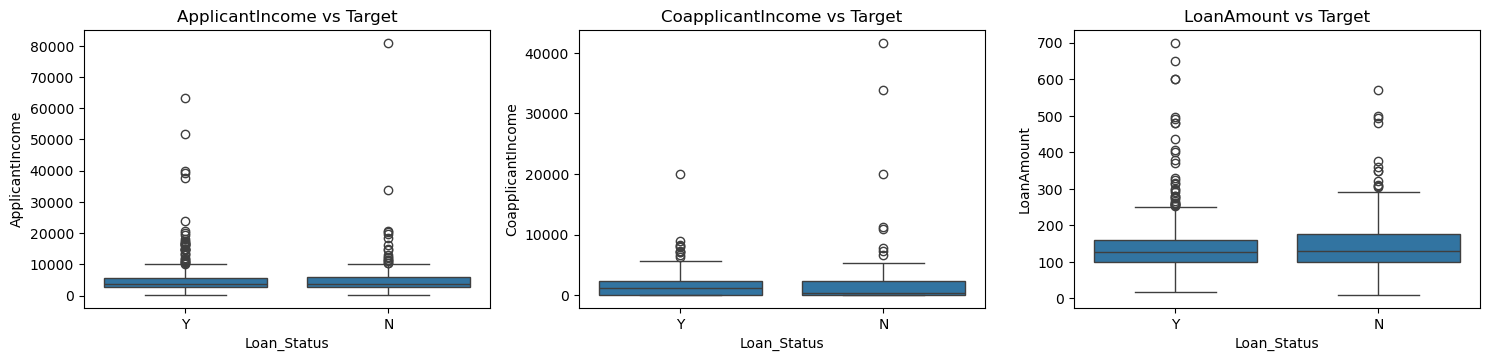

In [13]:
# Boxplots to analyze numerical features against the target variable

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_data, x='Loan_Status', y=column)  
    plt.title(f'{column} vs Target')
plt.tight_layout()
plt.show()

The boxplots for numerical features provide insight into their relationship with loan approval status (`Loan_Status`). Here is a summary of the observed patterns:

- Approved and not approved loans for `ApplicantIncome` and `CoapplicantIncome` have similar distributions, though some outliers exist for higher incomes.
- Higher `LoanAmount` values appear in both approved and unapproved loans but with more variability in the not approved group, potentially hinting at an influencing factor.


### Correlation Analysis

Correlation analysis considers the interactions between multiple variables, which can uncover deeper insights about the dataset.

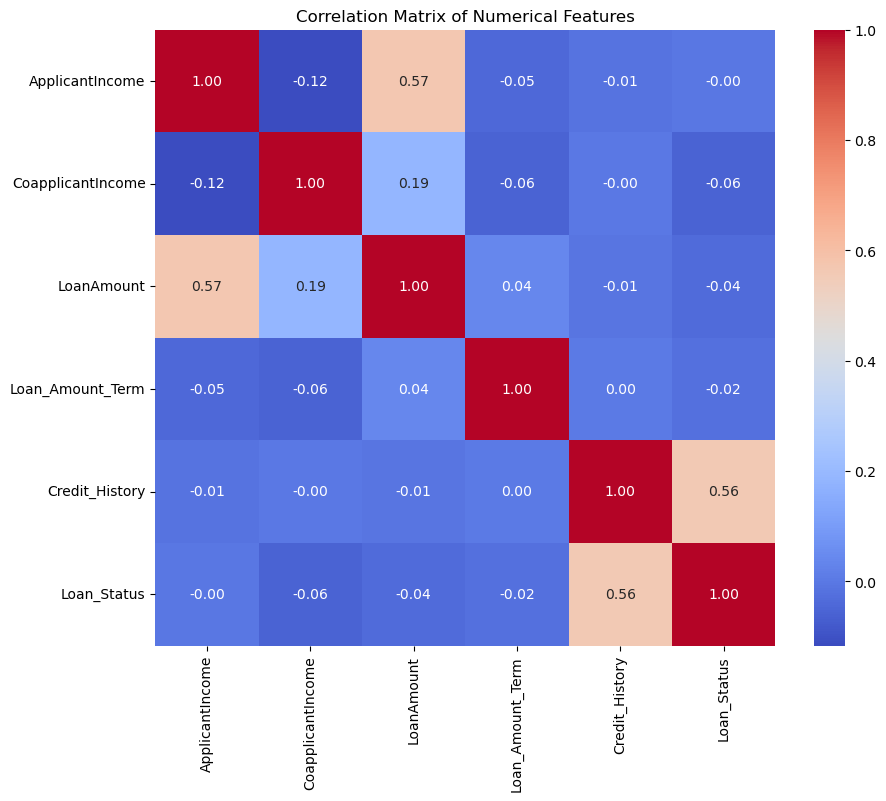

In [14]:
# Correlation matrix for numerical features

#  Prepare data for correlation analysis
train_data['Loan_Status'] = train_data['Loan_Status'].replace({'Y': 1, 'N': 0}).infer_objects(copy=False)

corr_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']

plt.figure(figsize=(10, 8))
sns.heatmap(train_data[corr_column].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix reveals several insights:

- `Credit_History` shows no strong correlations with numerical features but has a significant influence on loan approvals, as seen in earlier analysis.

- `CoapplicantIncome`, `LoanAmount` , and `ApplicantIncome` all have very low correlations with `Loan_Status`. This implies that income-related factors, both of the main applicant and co-applicant, do not significantly impact loan approval decisions.

- `Loan_Amount_Term` also shows a very low negative correlation with `Loan_Status`, indicating that the length of the loan term has little to no impact on loan approval.

- There is a moderate positive correlation of  between `ApplicantIncome` and `LoanAmount`. This indicates that as the applicant's income increases, the loan amount tends to increase as well, which is logical as higher-income applicants may be eligible for larger loan amounts.


## Missing Value and Outlier Treatment
Identifying missing values and outliers aims to improve data quality by ensuring accuracy and reliability, as these issues can skew analysis and lead to incorrect conclusions. Addressing them helps build robust models and derive meaningful insights from the data.


In [15]:
# Check for missing values
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Check for missing values
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
# Fill or drop missing values as necessary
# For example, filling categorical missing values with the mode and numerical with the median
for column in train_data.columns:
    if column in  categorical_features:
        train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
        test_data[column] = train_data[column].fillna(train_data[column].mode()[0])
    else:
        train_data[column] = train_data[column].fillna(train_data[column].median())
        test_data[column] = train_data[column].fillna(train_data[column].median())

Apply the log transformation to right-skewed column distributions: smaller values are only minimally impacted, while larger values are substantially reduced, resulting in a distribution that more closely resembles a normal distribution. This transformation mitigates the influence of extreme values, making the distribution more symmetric and suitable for modeling.

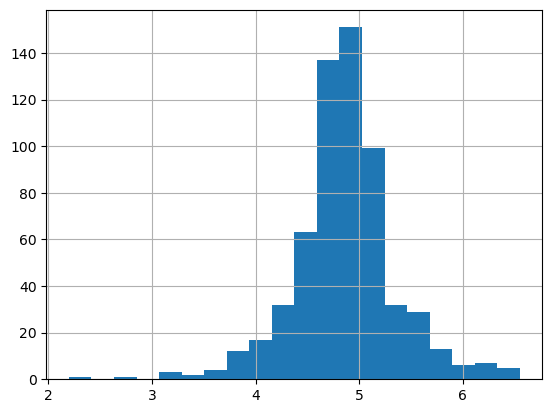

In [18]:
# Loan Amount
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount']) 
train_data['LoanAmount_log'].hist(bins=20) # effect of log transformation
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

`ApplicantIncome` and `CoapplicantIncome` include zero values. Since a log transformation requires positive values, a small constant can be added to shift the data

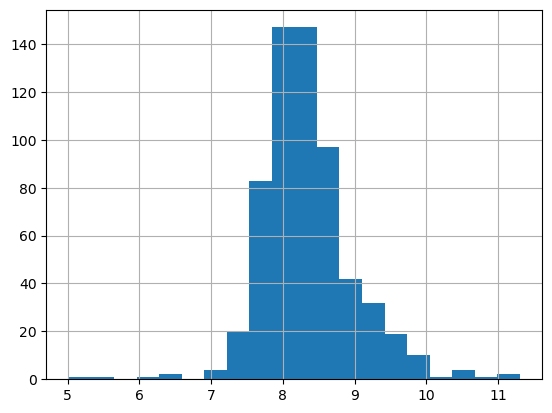

In [19]:
# ApplicantIncome
c = 1
train_data['ApplicantIncome_log'] = np.log(train_data['ApplicantIncome'] + c) 
train_data['ApplicantIncome_log'].hist(bins=20) # effect of log transformation
test_data['ApplicantIncome_log'] = np.log(test_data['ApplicantIncome'] + c)

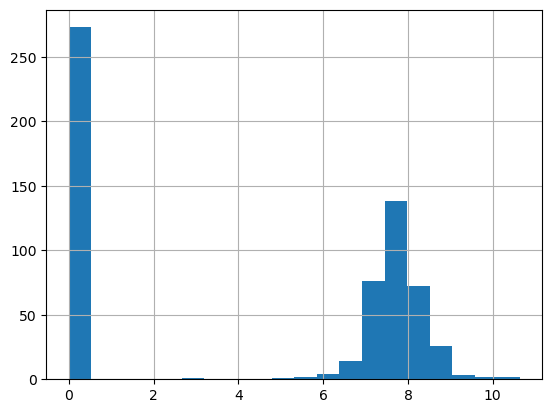

In [20]:
# CoapplicantIncome
train_data['CoapplicantIncome_log'] = np.log(train_data['CoapplicantIncome'] + c) 
train_data['CoapplicantIncome_log'].hist(bins=20) # effect of log transformation
test_data['CoapplicantIncome_log'] = np.log(test_data['CoapplicantIncome'] + c)

## Machine Learning Model